In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler

# <font color = 'green'> Importing data </font>

In [438]:
#importing data
covid = pd.read_csv("covid.csv")
Catalogs = pd.read_excel("Catalogs.xlsx")
Description = pd.read_excel("Description.xlsx")

covid.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [439]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [440]:
covid.isna().sum().sum()

0

In [441]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,566602.0,1.506726,0.499955,1.0,1.0,2.0,2.0,2.0
patient_type,566602.0,1.215165,0.410937,1.0,1.0,1.0,1.0,2.0
intubed,566602.0,76.562952,39.058676,1.0,97.0,97.0,97.0,99.0
pneumonia,566602.0,1.846262,0.560939,1.0,2.0,2.0,2.0,99.0
age,566602.0,42.622483,16.659973,0.0,31.0,41.0,53.0,120.0
pregnancy,566602.0,50.400692,47.501579,1.0,2.0,97.0,97.0,98.0
diabetes,566602.0,2.210633,5.683523,1.0,2.0,2.0,2.0,98.0
copd,566602.0,2.280221,5.327832,1.0,2.0,2.0,2.0,98.0
asthma,566602.0,2.265029,5.334658,1.0,2.0,2.0,2.0,98.0
inmsupr,566602.0,2.319628,5.667381,1.0,2.0,2.0,2.0,98.0


# <font color = 'green'> Treating missing values </font>

In [442]:
covid = covid.replace(99, np.NaN)
covid = covid.replace(98, np.NaN)
covid = covid.replace(97, np.NaN)

In [443]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,566602.0,1.506726,0.499955,1.0,1.0,2.0,2.0,2.0
patient_type,566602.0,1.215165,0.410937,1.0,1.0,1.0,1.0,2.0
intubed,121789.0,1.918178,0.274094,1.0,2.0,2.0,2.0,2.0
pneumonia,566591.0,1.844376,0.362499,1.0,2.0,2.0,2.0,2.0
age,566395.0,42.602292,16.629491,0.0,31.0,41.0,53.0,120.0
pregnancy,277903.0,1.985380,0.120027,1.0,2.0,2.0,2.0,2.0
diabetes,564621.0,1.874551,0.331227,1.0,2.0,2.0,2.0,2.0
copd,564853.0,1.983837,0.126104,1.0,2.0,2.0,2.0,2.0
asthma,564850.0,1.968087,0.175768,1.0,2.0,2.0,2.0,2.0
inmsupr,564622.0,1.984099,0.125092,1.0,2.0,2.0,2.0,2.0


In [444]:
covid.isnull().sum()

id                          0
sex                         0
patient_type                0
entry_date                  0
date_symptoms               0
date_died                   0
intubed                444813
pneumonia                  11
age                       207
pregnancy              288699
diabetes                 1981
copd                     1749
asthma                   1752
inmsupr                  1980
hypertension             1824
other_disease            2598
cardiovascular           1822
obesity                  1781
renal_chronic            1792
tobacco                  1907
contact_other_covid    175031
covid_res                   0
icu                    444814
dtype: int64

Text(11, 0, 'missing data with yellow')

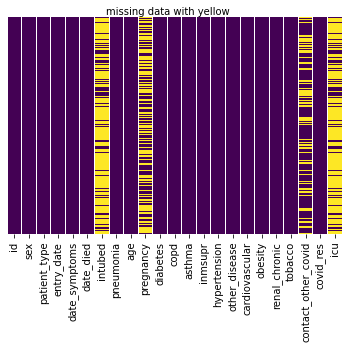

In [445]:
sns.heatmap(covid.isna(), cmap = 'viridis', cbar = False, yticklabels = False)
plt.text(11, 0, "missing data with yellow", ha = "center", va= "bottom")

In [446]:
round((covid['intubed'].value_counts() / covid.shape[0] )*100, 2)

2.0    19.74
1.0     1.76
Name: intubed, dtype: float64

## <font color = 'red'> we can see that the missing is about 80 % of the columns so we will drop it </font>

In [447]:
round((covid['pregnancy'].value_counts() / covid.shape[0] )*100, 2)

2.0    48.33
1.0     0.72
Name: pregnancy, dtype: float64

## <font color = 'red'> we can see that the missing is about 51 % of the columns so we will drop it </font>

In [448]:
round((covid['contact_other_covid'].value_counts() / covid.shape[0] )*100, 2)

1.0    39.16
2.0    29.95
Name: contact_other_covid, dtype: float64

## <font color = 'blue'> we can see that the missing is about 32 % of the columns but it's a very important feature so we will fill it </font>

In [449]:
covid['contact_other_covid'].fillna(method = 'ffill', inplace  = True)

In [450]:
round((covid['icu'].value_counts() / covid.shape[0] )*100, 2)

2.0    19.71
1.0     1.78
Name: icu, dtype: float64

## <font color = 'red'> we can see that the missing is about 80 % of the columns so we will drop it </font>

In [451]:
covid.drop(['icu', 'id', 'intubed', 'pregnancy'], axis = 1, inplace = True)

In [452]:
covid

,sex,patient_type,entry_date,date_symptoms,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,04-05-2020,02-05-2020,9999-99-99,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,2,1,19-03-2020,17-03-2020,9999-99-99,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1
3,2,2,17-04-2020,10-04-2020,9999-99-99,1.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,1,13-05-2020,03-05-2020,9999-99-99,2.0,58.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
566598,1,1,07-04-2020,06-04-2020,9999-99-99,2.0,48.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
566599,1,2,14-05-2020,01-05-2020,9999-99-99,1.0,49.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3
566600,1,1,31-05-2020,29-05-2020,9999-99-99,1.0,43.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3


In [453]:
covid.isnull().sum()

sex                       0
patient_type              0
entry_date                0
date_symptoms             0
date_died                 0
pneumonia                11
age                     207
diabetes               1981
copd                   1749
asthma                 1752
inmsupr                1980
hypertension           1824
other_disease          2598
cardiovascular         1822
obesity                1781
renal_chronic          1792
tobacco                1907
contact_other_covid       0
covid_res                 0
dtype: int64

In [454]:
round((covid['pneumonia'].value_counts() / covid.shape[0] )*100, 2)

2.0    84.44
1.0    15.56
Name: pneumonia, dtype: float64

In [455]:
round((covid['diabetes'].value_counts() / covid.shape[0] )*100, 2)

2.0    87.15
1.0    12.50
Name: diabetes, dtype: float64

In [456]:
round((covid['copd'].value_counts() / covid.shape[0] )*100, 2)

2.0    98.08
1.0     1.61
Name: copd, dtype: float64

## <font color = 'blue'> then the proportions of rest missing data is too small compared to number of raws so we will drop these raws </font>

In [457]:
covid.dropna(inplace = True)

In [458]:
covid.isna().sum()

sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
pneumonia              0
age                    0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
dtype: int64

In [459]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562444 entries, 0 to 566601
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  562444 non-null  int64  
 1   patient_type         562444 non-null  int64  
 2   entry_date           562444 non-null  object 
 3   date_symptoms        562444 non-null  object 
 4   date_died            562444 non-null  object 
 5   pneumonia            562444 non-null  float64
 6   age                  562444 non-null  float64
 7   diabetes             562444 non-null  float64
 8   copd                 562444 non-null  float64
 9   asthma               562444 non-null  float64
 10  inmsupr              562444 non-null  float64
 11  hypertension         562444 non-null  float64
 12  other_disease        562444 non-null  float64
 13  cardiovascular       562444 non-null  float64
 14  obesity              562444 non-null  float64
 15  renal_chronic    

In [460]:
covid

,sex,patient_type,entry_date,date_symptoms,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,04-05-2020,02-05-2020,9999-99-99,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,2,1,19-03-2020,17-03-2020,9999-99-99,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1
3,2,2,17-04-2020,10-04-2020,9999-99-99,1.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,1,13-05-2020,03-05-2020,9999-99-99,2.0,58.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
566598,1,1,07-04-2020,06-04-2020,9999-99-99,2.0,48.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
566599,1,2,14-05-2020,01-05-2020,9999-99-99,1.0,49.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3
566600,1,1,31-05-2020,29-05-2020,9999-99-99,1.0,43.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3


Text(8, 0, 'NO such missing data')

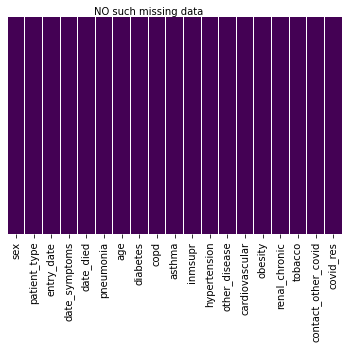

In [461]:
sns.heatmap(covid.isna(), cmap = 'viridis', cbar = False, yticklabels = False)
plt.text(8, 0, "NO such missing data", ha = "center", va= "bottom")

# <font color = 'green'>Treating outliers </font>

In [462]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,562444.0,1.506239,0.499962,1.0,1.0,2.0,2.0,2.0
patient_type,562444.0,1.213707,0.409922,1.0,1.0,1.0,1.0,2.0
pneumonia,562444.0,1.845706,0.361231,1.0,2.0,2.0,2.0,2.0
age,562444.0,42.566286,16.609801,0.0,31.0,41.0,53.0,120.0
diabetes,562444.0,1.875022,0.330694,1.0,2.0,2.0,2.0,2.0
copd,562444.0,1.983995,0.125495,1.0,2.0,2.0,2.0,2.0
asthma,562444.0,1.968102,0.175729,1.0,2.0,2.0,2.0,2.0
inmsupr,562444.0,1.984210,0.124662,1.0,2.0,2.0,2.0,2.0
hypertension,562444.0,1.836729,0.369613,1.0,2.0,2.0,2.0,2.0
other_disease,562444.0,1.969873,0.170938,1.0,2.0,2.0,2.0,2.0


## <font color = 'blue'> we can see that there is no outliers </font>

# <font color = 'green'>Label encoding</font>

In [463]:
covid.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res'],
      dtype='object')

In [464]:
covid_coded = covid.copy(deep = True)
covid_coded = covid_coded.loc[(covid_coded['covid_res'] == 1) | (covid_coded['covid_res'] == 2)]

In [465]:
les = {}
for i in (['entry_date', 'date_symptoms', 'date_died']) :
    les[i] = LabelEncoder()
    covid_coded[i] = les[i].fit_transform(covid_coded[i]) 


In [466]:
covid_coded

,sex,patient_type,entry_date,date_symptoms,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,22,10,121,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,2,1,110,98,121,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,1,2,33,3,121,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1
3,2,2,99,57,121,1.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,1,2,75,75,81,2.0,60.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,2,1,152,116,121,1.0,77.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2
499688,2,2,164,134,121,1.0,63.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2
499689,1,1,92,74,121,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
499690,1,1,158,146,121,2.0,45.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2


In [467]:
covid_coded.drop('date_died', axis = 1, inplace = True)

In [468]:
covid_coded.head()

,sex,patient_type,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,22,10,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,2,1,110,98,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,1,2,33,3,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1
3,2,2,99,57,1.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,1,2,75,75,2.0,60.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1


Text(0.5, 1.0, 'coorelation between our features')

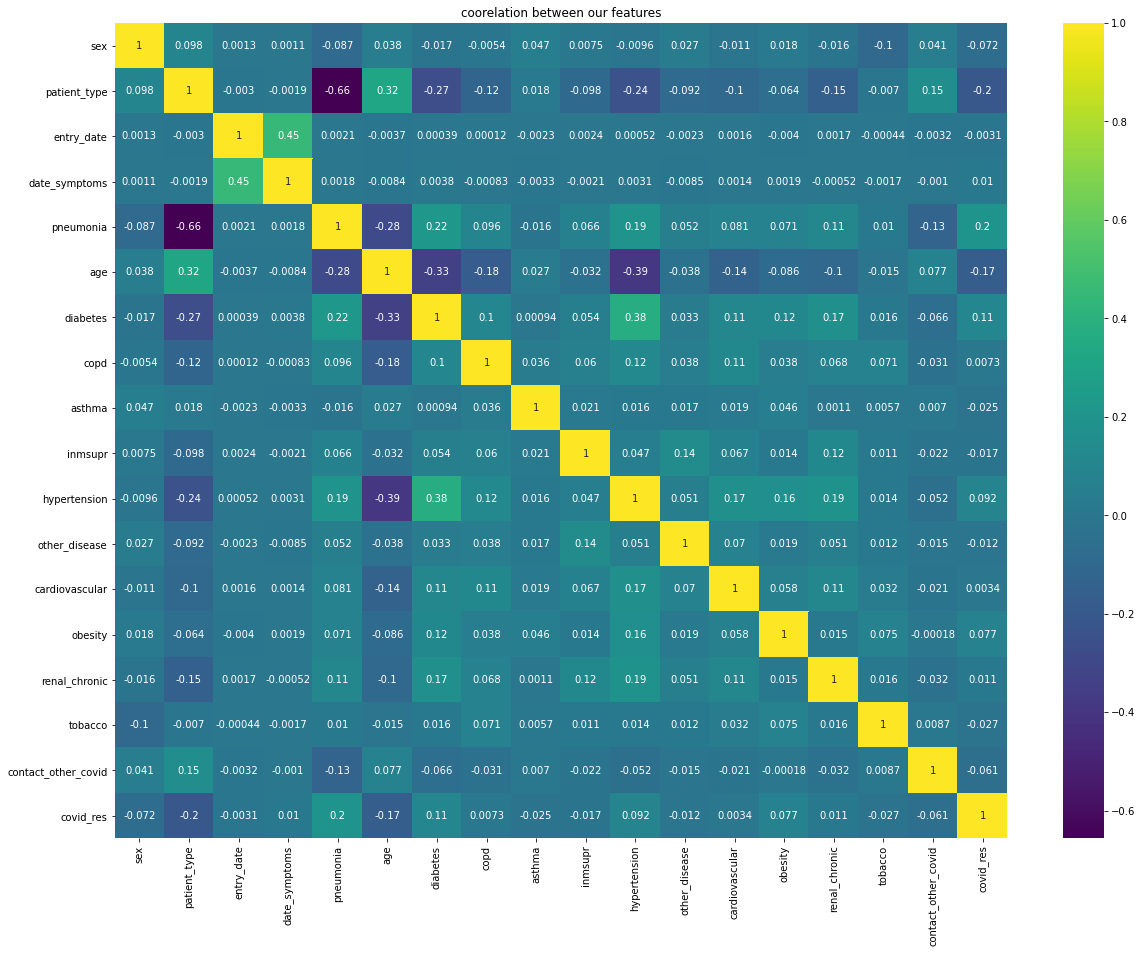

In [270]:
plt.figure(figsize = (20, 15))
sns.heatmap(covid_coded.corr(), cbar = True, cmap = 'viridis', annot = True)
plt.title("coorelation between our features")

In [40]:
print("                    Good relations")
for i in range(len(covid_coded.columns)) :
    for j in range(i) :
        if (abs(covid_coded.corr().iloc[i,j]) > 0.3 and covid_coded.corr().iloc[i,j] != 1 ) :
            print("(" + covid_coded.corr().columns[i] + ") and (" + covid_coded.corr().columns[j] + ")", end = "")
            print("         with coorelation : ", covid_coded.corr().iloc[i,j])
        

                    Good relations
(date_symptoms) and (entry_date)         with coorelation :  0.4514581472561178
(pneumonia) and (patient_type)         with coorelation :  -0.6561986126337078
(age) and (patient_type)         with coorelation :  0.3238838477190086
(diabetes) and (age)         with coorelation :  -0.3333939347928402
(hypertension) and (age)         with coorelation :  -0.39394996167147406
(hypertension) and (diabetes)         with coorelation :  0.3762877747873503


# <font color = 'green'> covid death only and its Label encoding </font>

In [469]:
covid_death_not_coded = covid.copy(deep = True)

In [470]:
covid_death_not_coded = covid_death_not_coded.loc[(covid_death_not_coded['covid_res'] == 1)]

covid_death_not_coded

,sex,patient_type,entry_date,date_symptoms,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,04-05-2020,02-05-2020,9999-99-99,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,2,1,19-03-2020,17-03-2020,9999-99-99,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1
3,2,2,17-04-2020,10-04-2020,9999-99-99,1.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,1,2,10-06-2020,08-06-2020,10-06-2020,1.0,88.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1
220653,1,1,11-06-2020,01-06-2020,9999-99-99,2.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
220654,1,1,11-06-2020,10-06-2020,9999-99-99,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
220655,1,1,19-06-2020,16-06-2020,9999-99-99,2.0,36.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1


In [471]:
covid_death_not_coded.loc[covid_death_not_coded['date_died'] != '9999-99-99' , 'date_died'] = 'yes die'

covid_death_not_coded['date_died'] = covid_death_not_coded['date_died'].replace('9999-99-99', 'no die')


In [472]:
covid_death_not_coded

,sex,patient_type,entry_date,date_symptoms,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,04-05-2020,02-05-2020,no die,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,2,1,19-03-2020,17-03-2020,no die,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,1,2,06-04-2020,01-04-2020,no die,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1
3,2,2,17-04-2020,10-04-2020,no die,1.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,1,2,13-04-2020,13-04-2020,yes die,2.0,60.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,1,2,10-06-2020,08-06-2020,yes die,1.0,88.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1
220653,1,1,11-06-2020,01-06-2020,no die,2.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
220654,1,1,11-06-2020,10-06-2020,no die,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
220655,1,1,19-06-2020,16-06-2020,no die,2.0,36.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1


In [473]:
covid_death_not_coded['Died or not'] = covid_death_not_coded['date_died']
covid_death_not_coded.drop('date_died', axis= 1, inplace = True)

covid_death_not_coded

,sex,patient_type,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,Died or not
0,2,1,04-05-2020,02-05-2020,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,no die
1,2,1,19-03-2020,17-03-2020,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,no die
2,1,2,06-04-2020,01-04-2020,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,no die
3,2,2,17-04-2020,10-04-2020,1.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,no die
4,1,2,13-04-2020,13-04-2020,2.0,60.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1,yes die
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,1,2,10-06-2020,08-06-2020,1.0,88.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1,yes die
220653,1,1,11-06-2020,01-06-2020,2.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,no die
220654,1,1,11-06-2020,10-06-2020,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,no die
220655,1,1,19-06-2020,16-06-2020,2.0,36.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,no die


In [474]:
covid_death = covid_death_not_coded.copy(deep = True)

In [475]:
les = {}
for i in (['entry_date', 'date_symptoms', 'Died or not']) :
    les[i] = LabelEncoder()
    covid_death[i] = les[i].fit_transform(covid_death[i]) 


In [476]:
covid_death

,sex,patient_type,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,Died or not
0,2,1,12,6,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
1,2,1,73,70,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
2,1,2,19,1,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,0
3,2,2,66,40,1.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
4,1,2,49,53,2.0,60.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,1,2,37,34,1.0,88.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1
220653,1,1,41,3,2.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0
220654,1,1,41,42,2.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
220655,1,1,76,68,2.0,36.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0


Text(0.5, 1.0, 'coorelation between our features')

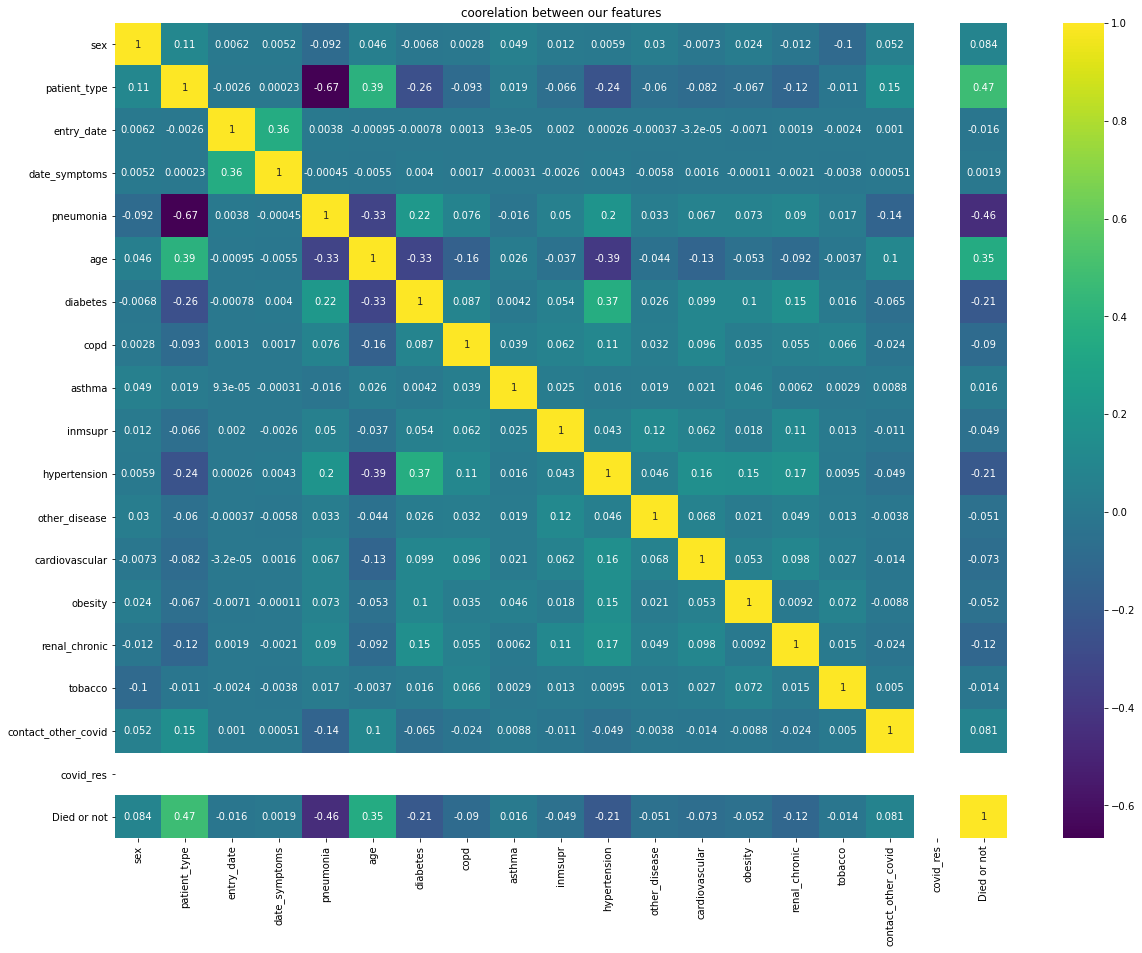

In [185]:
plt.figure(figsize = (20, 15))
sns.heatmap(covid_death.corr(), cbar = True, cmap = 'viridis', annot = True)
plt.title("coorelation between our features")

In [124]:
print("                    Good relations")
for i in range(len(covid_death.columns)) :
    for j in range(i) :
        if (abs(covid_death.corr().iloc[i,j]) > 0.3 and covid_death.corr().iloc[i,j] != 1 ) :
            print("(" + covid_death.corr().columns[i] + ") and (" + covid_death.corr().columns[j] + ")", end = "")
            print("         with coorelation : ", covid_death.corr().iloc[i,j])
        

                    Good relations
(date_symptoms) and (entry_date)         with coorelation :  0.35583639411996926
(pneumonia) and (patient_type)         with coorelation :  -0.6674303733765352
(age) and (patient_type)         with coorelation :  0.3943221879848945
(age) and (pneumonia)         with coorelation :  -0.3325916780611454
(diabetes) and (age)         with coorelation :  -0.32658362195795465
(hypertension) and (age)         with coorelation :  -0.39377380691217406
(hypertension) and (diabetes)         with coorelation :  0.3671743716018467
(Died or not) and (patient_type)         with coorelation :  0.4738709123187506
(Died or not) and (pneumonia)         with coorelation :  -0.458008170987363
(Died or not) and (age)         with coorelation :  0.3516028524946232


# <font color = 'green'> Standardization </font>

In [477]:
covid_coded.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'pneumonia',
       'age', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res'],
      dtype='object')

In [478]:
covid_death.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'pneumonia',
       'age', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'Died or not'],
      dtype='object')

In [479]:
for i in (['entry_date', 'date_symptoms', 'age']) :
    covid_coded[i] = (covid_coded[i] - covid_coded[i].min()) / (covid_coded[i].max() - covid_coded[i].min())
    
for i in (['entry_date', 'date_symptoms', 'age']) :
    covid_death[i] = (covid_death[i] - covid_death[i].min()) / (covid_death[i].max() - covid_death[i].min())

In [480]:
#scale = StandardScaler()
#scaled = StandardScaler()

#covid_coded = pd.DataFrame(scale.fit_transform(covid_coded[['entry_date', 'date_symptoms', 'age']]), columns = ['sex', 'patient_type', 'entry_date', 'date_symptoms', 'pneumonia','age', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension','other_disease', 'cardiovascular', 'obesity', 'renal_chronic','tobacco', 'contact_other_covid', 'covid_res'])
#covid_death = pd.DataFrame(scaled.fit_transform(covid_death[['entry_date', 'date_symptoms', 'age']]), columns = ['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died','pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr','hypertension', 'other_disease', 'cardiovascular', 'obesity','renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res'])

In [481]:
covid_coded

,sex,patient_type,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,0.122222,0.055866,2.0,0.225000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,2,1,0.611111,0.547486,2.0,0.200000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,1,2,0.183333,0.016760,2.0,0.450000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1
3,2,2,0.550000,0.318436,1.0,0.250000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,1,2,0.416667,0.418994,2.0,0.500000,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,2,1,0.844444,0.648045,1.0,0.641667,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2
499688,2,2,0.911111,0.748603,1.0,0.525000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2
499689,1,1,0.511111,0.413408,2.0,0.208333,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
499690,1,1,0.877778,0.815642,2.0,0.375000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2


In [482]:
covid_death

,sex,patient_type,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,Died or not
0,2,1,0.095238,0.044118,2.0,0.225000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
1,2,1,0.579365,0.514706,2.0,0.200000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
2,1,2,0.150794,0.007353,2.0,0.450000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,0
3,2,2,0.523810,0.294118,1.0,0.250000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
4,1,2,0.388889,0.389706,2.0,0.500000,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,1,2,0.293651,0.250000,1.0,0.733333,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1
220653,1,1,0.325397,0.022059,2.0,0.250000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0
220654,1,1,0.325397,0.308824,2.0,0.225000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
220655,1,1,0.603175,0.500000,2.0,0.300000,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0


In [483]:
covid_coded.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,496104.0,1.505983,0.499965,1.0,1.000000,2.000000,2.000000,2.0
patient_type,496104.0,1.213629,0.409868,1.0,1.000000,1.000000,1.000000,2.0
entry_date,496104.0,0.514341,0.276756,0.0,0.288889,0.527778,0.750000,1.0
date_symptoms,496104.0,0.499733,0.283210,0.0,0.262570,0.497207,0.726257,1.0
pneumonia,496104.0,1.843926,0.362926,1.0,2.000000,2.000000,2.000000,2.0
age,496104.0,0.354101,0.138265,0.0,0.258333,0.341667,0.441667,1.0
diabetes,496104.0,1.875308,0.330369,1.0,2.000000,2.000000,2.000000,2.0
copd,496104.0,1.983542,0.127230,1.0,2.000000,2.000000,2.000000,2.0
asthma,496104.0,1.967479,0.177380,1.0,2.000000,2.000000,2.000000,2.0
inmsupr,496104.0,1.983907,0.125835,1.0,2.000000,2.000000,2.000000,2.0


In [484]:
covid_death.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,218821.0,1.546753,0.497811,1.0,1.000000,2.000000,2.000000,2.0
patient_type,218821.0,1.307749,0.461563,1.0,1.000000,1.000000,2.000000,2.0
entry_date,218821.0,0.489535,0.273859,0.0,0.261905,0.507937,0.698413,1.0
date_symptoms,218821.0,0.475605,0.280312,0.0,0.250000,0.463235,0.698529,1.0
pneumonia,218821.0,1.761371,0.426246,1.0,2.000000,2.000000,2.000000,2.0
age,218821.0,0.380237,0.135672,0.0,0.275000,0.375000,0.466667,1.0
diabetes,218821.0,1.835971,0.370303,1.0,2.000000,2.000000,2.000000,2.0
copd,218821.0,1.982497,0.131136,1.0,2.000000,2.000000,2.000000,2.0
asthma,218821.0,1.972448,0.163686,1.0,2.000000,2.000000,2.000000,2.0
inmsupr,218821.0,1.986340,0.116073,1.0,2.000000,2.000000,2.000000,2.0


# <font color = 'green'> Data visualization </font>

## Covid test result 

Text(0.5, 1.0, 'covid test results')

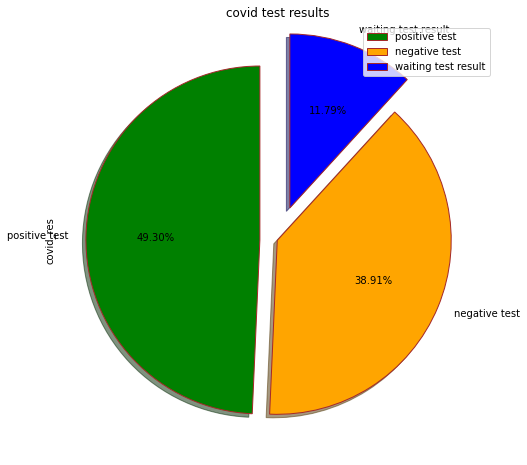

In [353]:
explode = (0.1, 0.0, 0.2)
fig, ax = plt.subplots(figsize =(10, 7))
round(covid['covid_res'].value_counts() / covid.shape[0] * 100 , 2).plot.pie(colors = ['green', 'orange', 'blue'] , autopct = "%1.2f%%", figsize = (12,8),labels = ['positive test', 'negative test', 'waiting test result'] ,
                                                                                        explode  = explode, shadow = True, startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "brown" }, textprops = dict(color ="black")
                                                                                       , legend = True)
ax.set_title("covid test results")
#ax.legend(covid, ['positive test', 'negative test', 'waiting test result'], title ="covid test results",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
#plt.setp(['positive test', 'negative test', 'waiting test result'], size = 8, weight ="bold")

<AxesSubplot:xlabel='age', ylabel='covid_res'>

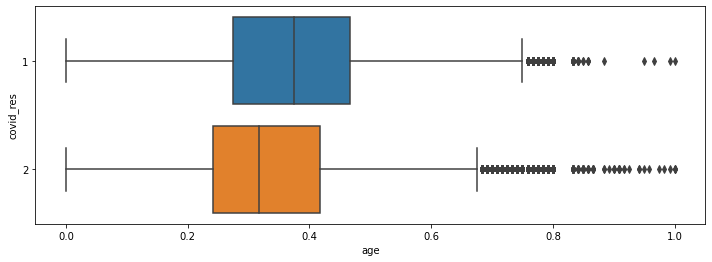

In [354]:
f = plt.figure(figsize=(12,4))
sns.boxplot(x='age', y='covid_res', data=covid_coded, orient = 'h' )

### So we conclude that older people are more affected to test positive for corona virus

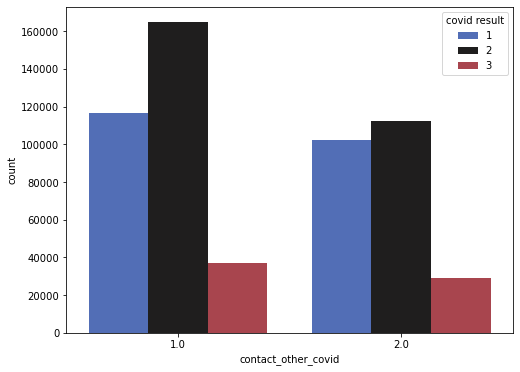

In [64]:
plt.figure(figsize=(8,6))
plot = sns.countplot(x='contact_other_covid',hue='covid_res',data=covid, palette = 'icefire')
#sns.color_palette("magma", as_cmap=True)
plot.legend_.set_title('covid result')
plt.show()

### we can conclude that contacting persons with covid increases the percentage of testing positive so anyone tests positive should stay in quarantine

In [65]:
features=[ 'pneumonia','diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco']
list(enumerate(features))


[(0, 'pneumonia'),
 (1, 'diabetes'),
 (2, 'copd'),
 (3, 'asthma'),
 (4, 'inmsupr'),
 (5, 'hypertension'),
 (6, 'other_disease'),
 (7, 'cardiovascular'),
 (8, 'obesity'),
 (9, 'renal_chronic'),
 (10, 'tobacco')]

C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

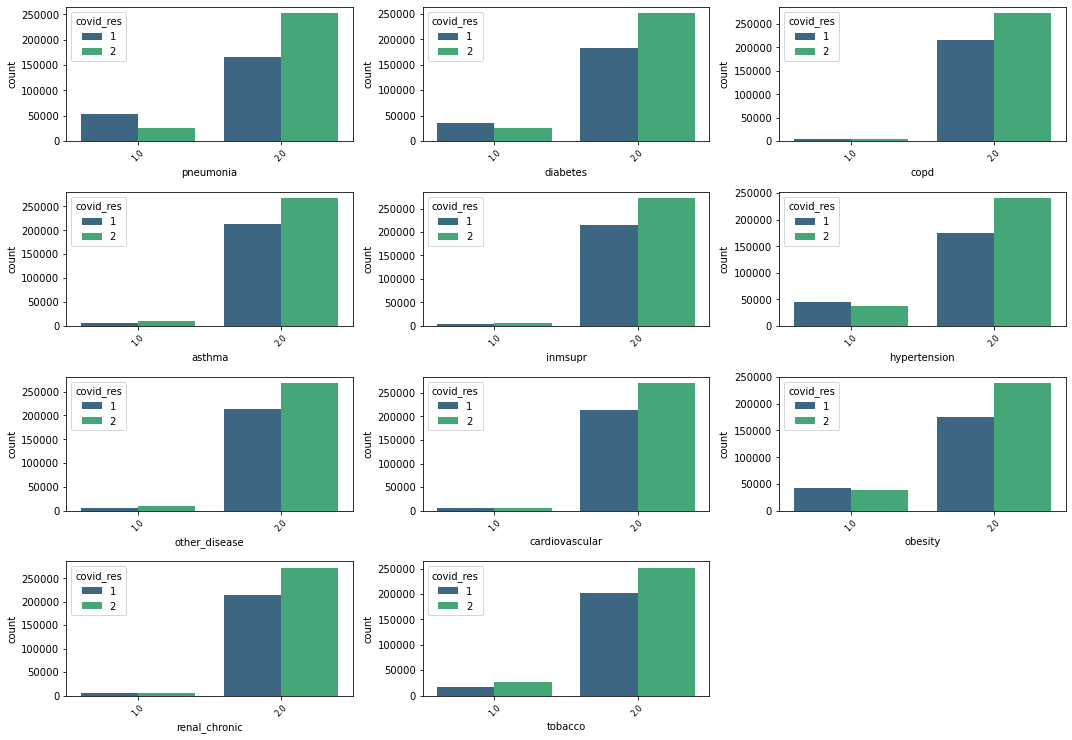

In [66]:
plt.figure(figsize=(15,15))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='covid_res',data=covid_coded,palette='viridis')
    plt.xticks(rotation=45,size=8)
    plt.tight_layout() 

### So we can notice a few things from the previous graphs which are :  
### -  People who suffer from pneumonia usually tests positive for covid 19
### - Diabetic people are at high risk of testing positive for covid 19 
### - A good percentage of hypertension people tests positive for covid 19 
### - some tobacco users tests positive for covid 19  
### - people who suffer from obesity are at risk of testing positive for covid 19

In [67]:
female = covid_coded[covid_coded['sex'] == 1]
male   = covid_coded[covid_coded['sex'] == 2]
female_positive = female[female['covid_res'] == 1]
female_negative = female[female['covid_res'] == 2]
male_positive = male[male['covid_res'] == 1]
male_negative = male[male['covid_res'] == 2]

C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

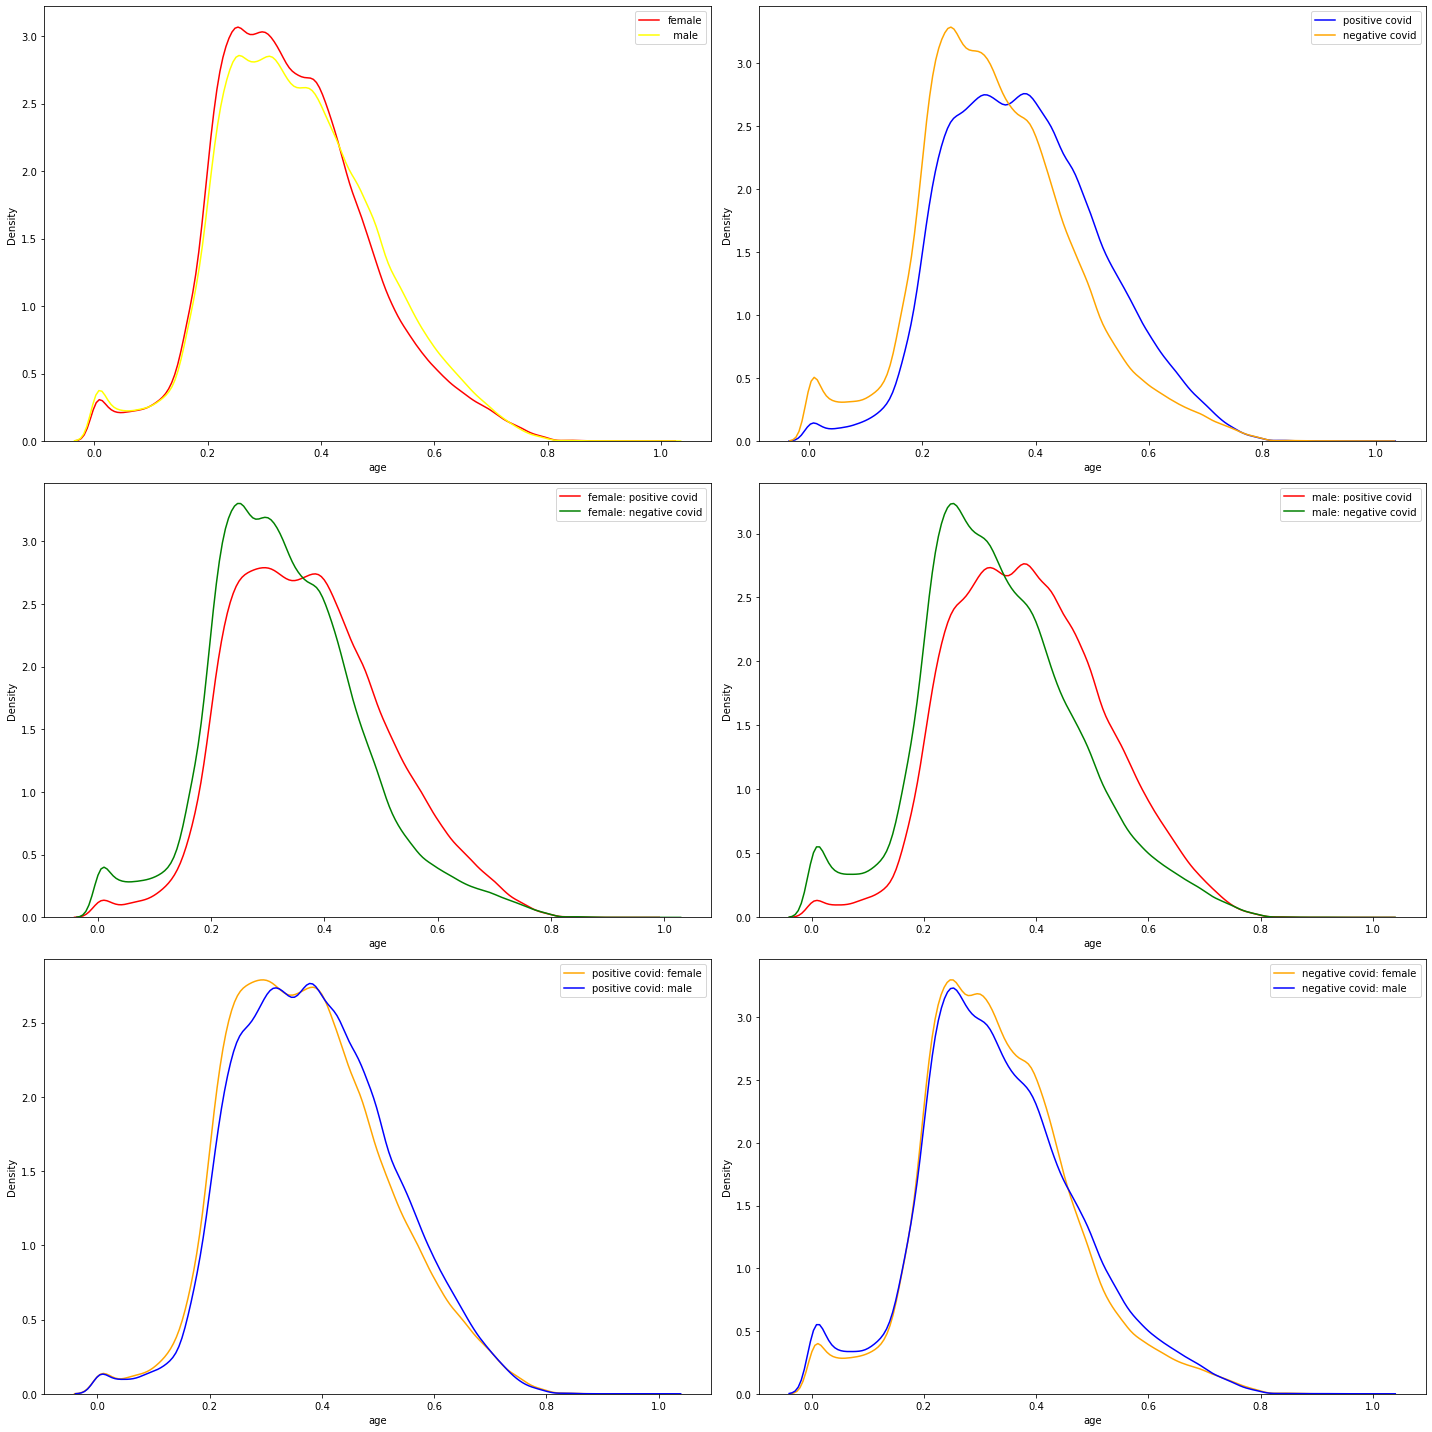

In [68]:
plt.figure(figsize = (20,20))
plt.subplot(3,2,1)
sns.distplot(female['age'], kde = True, label = 'female', color = 'red',hist=False)
sns.distplot(male['age'], kde = True, label = '  male', color = 'yellow',hist=False)
plt.legend()

plt.subplot(3,2,2)
sns.distplot(covid_coded[covid_coded['covid_res']==1]['age'], kde = True, label = 'positive covid', color = 'blue',hist=False)
sns.distplot(covid_coded[covid_coded['covid_res']==2]['age'], kde = True, label = 'negative covid', color = 'orange',hist=False)
plt.legend()

plt.subplot(3,2,3)
sns.kdeplot(female_positive['age'], label = 'female: positive covid', color = 'red')
sns.kdeplot(female_negative['age'], label = 'female: negative covid', color = 'green')
plt.legend()
plt.subplot(3,2,4)
sns.kdeplot(male_positive['age'], label = 'male: positive covid', color = 'red')
sns.kdeplot(male_negative['age'], label = 'male: negative covid', color = 'green')
plt.legend()

plt.subplot(3,2,5)
sns.kdeplot(female_positive['age'], label = 'positive covid: female', color = 'orange')
sns.kdeplot(male_positive['age'],   label = 'positive covid: male', color = 'blue')
plt.legend()

plt.subplot(3,2,6)
sns.kdeplot(female_negative['age'], label = 'negative covid: female', color = 'orange')
sns.kdeplot(male_negative['age'], label   = 'negative covid: male', color = 'blue')
plt.legend()

plt.tight_layout()

### We can notice that gender doesn't have a great effect on the test result 

## Covid death

C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


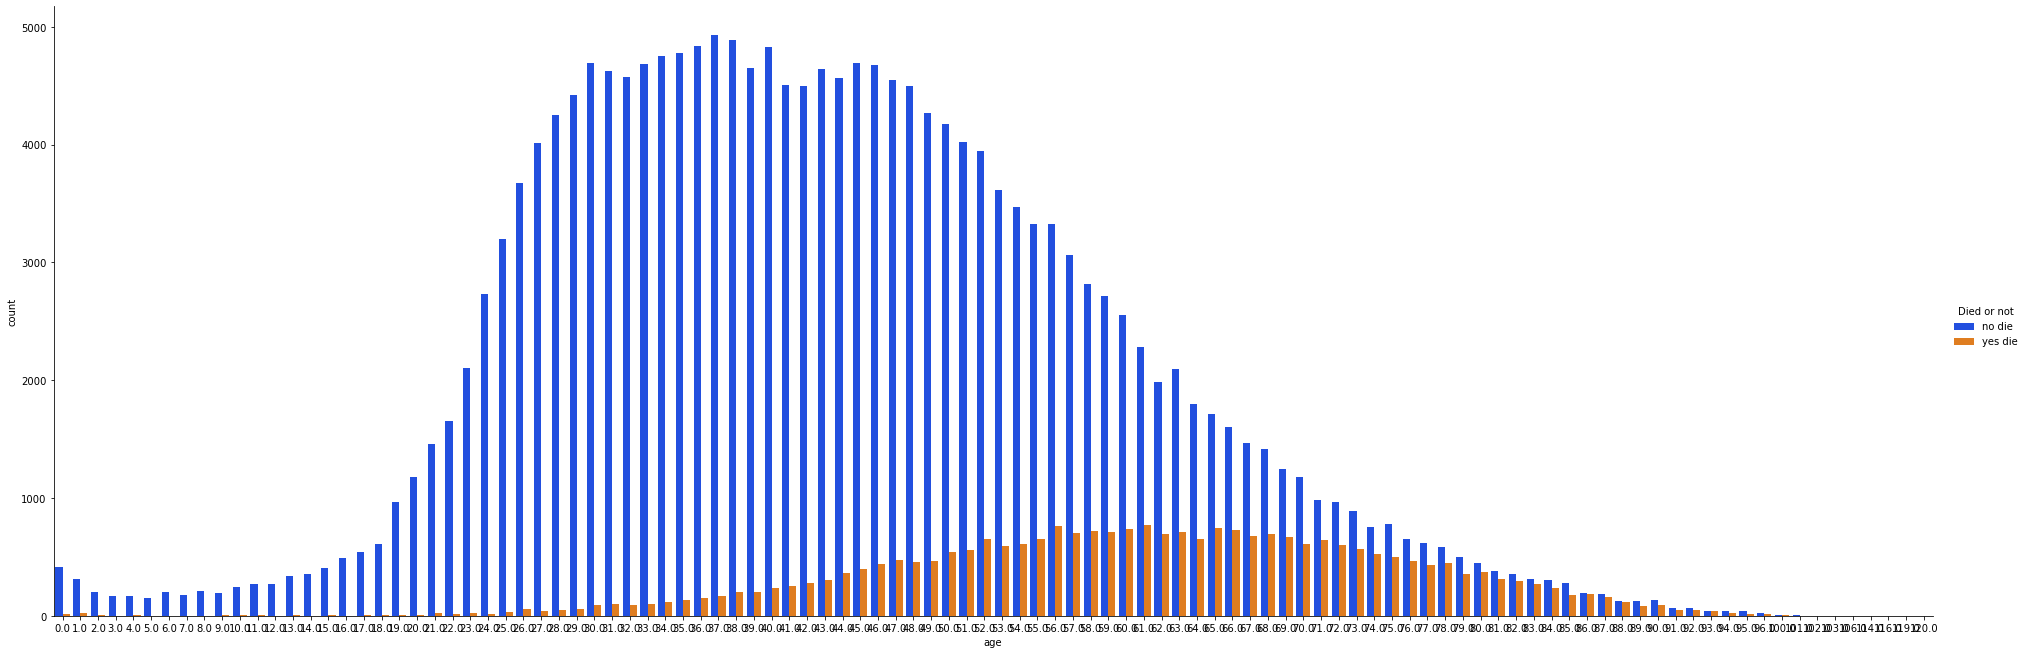

In [69]:
sns.catplot('age',data=covid_death_not_coded,hue='Died or not',kind='count',palette='bright',aspect=3,height=9)


## We can see that deaths increase as the age increase

<AxesSubplot:xlabel='sex', ylabel='count'>

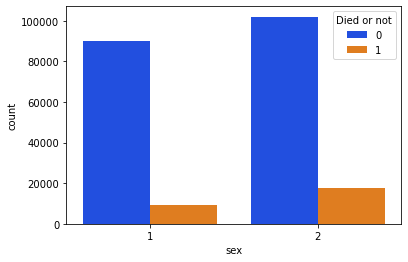

In [71]:
sns.countplot(x='sex',hue='Died or not',data=covid_death,palette='bright')

Text(0.5, 1.0, 'Death percentage')

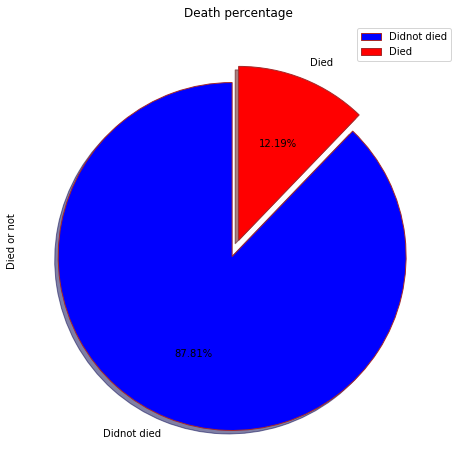

In [72]:
explode = (0.1, 0.0)
fig, ax = plt.subplots(figsize =(10, 7))
round(covid_death_not_coded['Died or not'].value_counts() / covid.shape[0] * 100 , 2).plot.pie(colors = ['blue', 'red'] , autopct = "%1.2f%%", figsize = (12,8),labels = ['Didnot died','Died'] ,
                                                                                        explode  = explode, shadow = True, startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "brown" }, textprops = dict(color ="black")
                                                                                       , legend = True)
ax.set_title("Death percentage")
#ax.legend(covid, ['positive test', 'negative test', 'waiting test result'], title ="covid test results",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
#plt.setp(['positive test', 'negative test', 'waiting test result'], size = 8, weight ="bold")

## We can see that more males have died from covid 19 then females

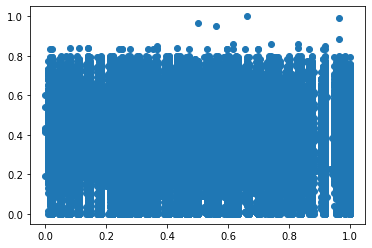

In [73]:
plt.scatter(covid_death['date_symptoms'],covid_death['age'])

C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Died or not', ylabel='patient_type'>

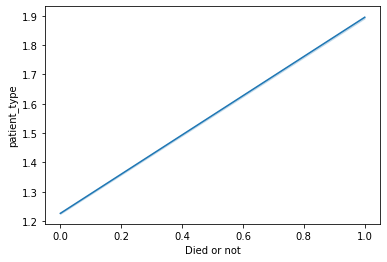

In [74]:
sns.lineplot('Died or not', 'patient_type', data=covid_death)

C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

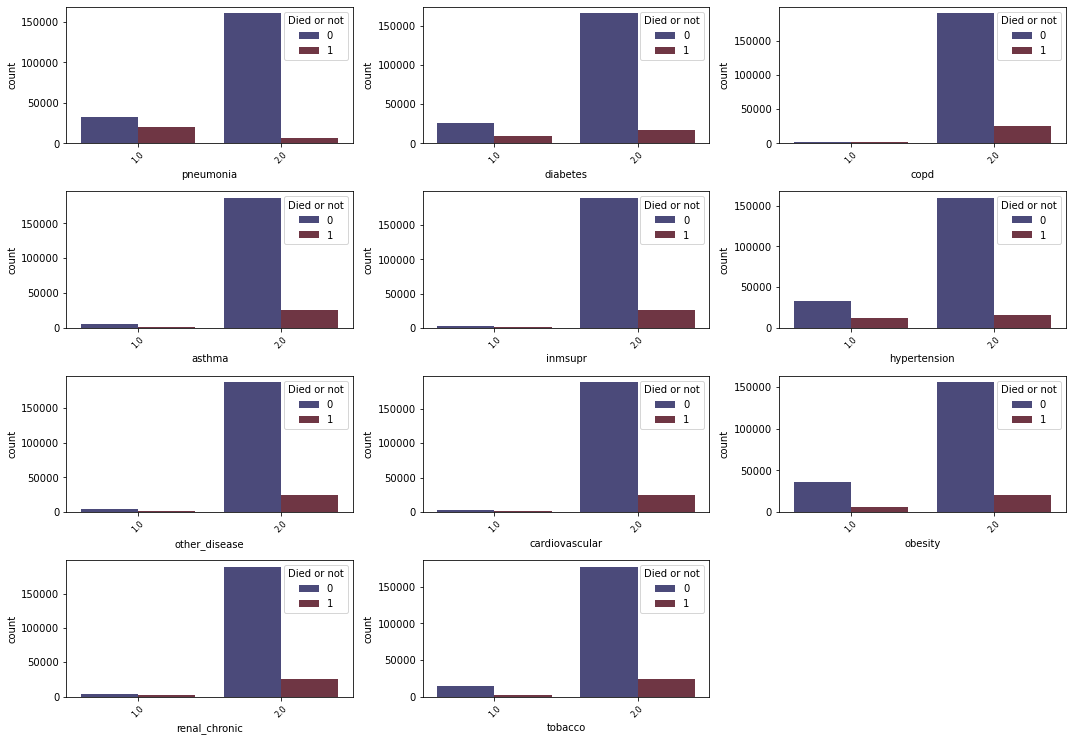

In [75]:
plt.figure(figsize=(15,15))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='Died or not',data=covid_death,palette='icefire')
    plt.xticks(rotation=45,size=8)
    plt.tight_layout() 

<AxesSubplot:ylabel='Died or not'>

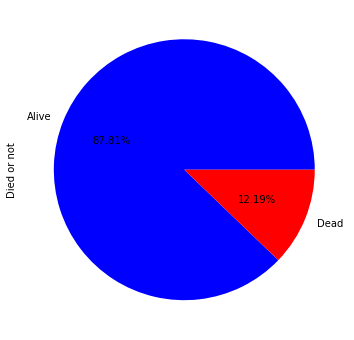

In [76]:
round(covid_death['Died or not'].value_counts() / covid_death.shape[0] * 100 , 2).plot.pie(colors = ['blue', 'red'] , autopct = "%1.2f%%", figsize = (8,6),labels = ['Alive', 'Dead']  )

# <font color = 'green' >Droping Gender from data sets</font>

In [485]:
covid_coded.drop('sex', axis =1, inplace = True)
covid_death.drop('sex', axis =1, inplace = True)

# <font color = 'green'> Choosing important features for modeling (PCA) method (Princible component analysis) </font>

In [486]:
from sklearn.decomposition import PCA

In [487]:
covid_res = covid_coded['covid_res']

In [488]:
covid_coded = covid_coded.drop('covid_res', axis = 1)
covid_coded

,patient_type,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid
0,1,0.122222,0.055866,2.0,0.225000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1,0.611111,0.547486,2.0,0.200000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,2,0.183333,0.016760,2.0,0.450000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
3,2,0.550000,0.318436,1.0,0.250000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2,0.416667,0.418994,2.0,0.500000,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,1,0.844444,0.648045,1.0,0.641667,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
499688,2,0.911111,0.748603,1.0,0.525000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0
499689,1,0.511111,0.413408,2.0,0.208333,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
499690,1,0.877778,0.815642,2.0,0.375000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0


In [489]:
pca = PCA(n_components = 10)
covid_coded = pd.DataFrame(pca.fit_transform(covid_coded))

In [490]:
covid_coded['covid_res'] = covid_res
covid_coded

,0,1,2,3,4,5,6,7,8,9,covid_res
0,-0.036266,-0.686168,-0.030970,-0.080141,-0.588653,-0.060024,0.008365,0.020656,-0.022585,-0.028233,1.0
1,-0.041381,-0.687308,-0.030832,-0.047173,0.103747,-0.061890,0.009631,0.020958,-0.038339,-0.030141,1.0
2,0.685451,-0.238557,0.239443,0.786237,-0.613125,-0.200308,0.017640,-0.645071,-0.099061,-0.099810,1.0
3,1.009753,-0.183799,-0.739931,0.283038,-0.114689,-0.085814,-0.080444,0.137635,-0.153193,-0.035626,1.0
4,1.192677,0.077673,0.408121,-0.818995,-0.086671,-0.000986,0.189737,-0.567158,0.010737,0.012623,1.0
...,...,...,...,...,...,...,...,...,...,...,...
496099,0.509290,-0.392977,-0.274177,0.236151,0.333473,0.914952,-0.202270,0.693413,-0.119893,0.396147,2.0
496100,1.478397,0.271030,0.473647,0.625531,0.432553,0.689558,-0.733503,0.149930,-0.119318,-0.114219,2.0
496101,-0.039910,-0.686849,-0.030661,-0.055201,-0.062153,-0.061505,0.009400,0.021108,-0.058208,-0.029431,2.0
496102,-0.207677,0.437298,0.344747,-0.548301,0.503257,-0.142891,-0.545792,0.053053,-0.046916,-0.064531,2.0


In [491]:
print(pca.explained_variance_ratio_)

[0.24095127 0.16981238 0.11483354 0.09091747 0.08640326 0.0590658
 0.05627212 0.03838258 0.03261967 0.0241441 ]


In [492]:
print(pca.components_)

[[ 5.77343729e-01 -2.49647878e-03 -2.60641005e-03 -4.67813596e-01
   1.04529073e-01 -2.73674350e-01 -3.47960883e-02  2.97371848e-03
  -2.22155494e-02 -3.10926807e-01 -2.74436299e-02 -3.99341460e-02
  -1.20904350e-01 -4.84341967e-02 -1.00906735e-02  4.94151384e-01]
 [ 2.73486836e-01  1.62646076e-03 -7.88594125e-04 -2.26845738e-01
   6.18992845e-02 -1.91896232e-01 -1.93599849e-02 -3.60957254e-03
  -1.05846170e-02 -2.53096440e-01 -1.54512665e-02 -2.81466054e-02
  -1.60066669e-01 -2.99917433e-02 -2.43954976e-02 -8.60454747e-01]
 [-3.76012633e-01  4.18824623e-03 -1.55829134e-03  3.35473850e-01
   4.57309402e-02 -2.75005133e-01 -1.45273238e-02 -2.67883285e-02
   3.57285747e-03 -4.90496150e-01  2.73373943e-03 -3.63591000e-02
  -6.35819064e-01 -2.17908860e-02 -7.38443062e-02  1.23618865e-01]
 [ 1.51185082e-01  3.20870680e-02  3.15790789e-02 -1.91731672e-01
  -7.02332281e-02  3.59556457e-01  1.33372843e-02 -1.49433514e-02
   2.03089197e-03  5.04836047e-01 -7.46824009e-04  2.72477817e-02
  -7.30

In [493]:
date_died = covid_death['Died or not']

In [494]:
covid_death.drop("Died or not", axis = 1, inplace = True)
covid_death

,patient_type,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,1,0.095238,0.044118,2.0,0.225000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,1,0.579365,0.514706,2.0,0.200000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,2,0.150794,0.007353,2.0,0.450000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1
3,2,0.523810,0.294118,1.0,0.250000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2,0.388889,0.389706,2.0,0.500000,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,2,0.293651,0.250000,1.0,0.733333,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1
220653,1,0.325397,0.022059,2.0,0.250000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
220654,1,0.325397,0.308824,2.0,0.225000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
220655,1,0.603175,0.500000,2.0,0.300000,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1


In [495]:
pcad = PCA(n_components = 10)
covid_death = pd.DataFrame(pcad.fit_transform(covid_death))

In [496]:
covid_death['Died or not'] = date_died

In [497]:
covid_death

,0,1,2,3,4,5,6,7,8,9,Died or not
0,-0.305332,-0.675987,-0.036719,-0.088225,-0.585130,-0.000369,-0.050102,0.031419,-0.007297,-0.023116,0.0
1,-0.308855,-0.678110,-0.036049,-0.075343,0.089136,-0.004765,-0.055711,0.033834,-0.038900,-0.024741,0.0
2,0.466038,-0.390477,0.183790,0.802757,-0.587113,0.016157,-0.184747,-0.664366,-0.067580,-0.071959,0.0
3,0.878482,-0.376772,-0.696479,0.153296,-0.110913,-0.069245,-0.059916,0.097564,-0.153811,-0.045688,0.0
4,0.969212,-0.150703,0.626634,-0.789508,-0.117090,0.122500,-0.072265,-0.567552,0.019380,0.155281,1.0
...,...,...,...,...,...,...,...,...,...,...,...
218816,1.195894,0.918416,0.118299,-0.639432,-0.285262,0.117224,-0.060976,0.162620,-0.013093,-0.102707,1.0
218817,-0.619401,0.262071,-0.178166,-0.087002,-0.442193,0.007166,-0.058737,0.022420,-0.190996,-0.023936,0.0
218818,-0.305767,-0.676665,-0.036032,-0.082330,-0.234671,-0.002984,-0.052854,0.032540,0.005659,-0.024030,0.0
218819,-0.617558,0.266996,-0.155402,-0.066856,0.096054,-0.001146,-0.063637,0.025827,-0.065298,0.322845,0.0


In [498]:
print(pcad.explained_variance_ratio_)

[0.26702147 0.15911116 0.12199794 0.09744885 0.07077619 0.06290316
 0.04827356 0.0440664  0.03357507 0.01957442]


In [499]:
print(pcad.components_)

[[ 6.32513849e-01 -1.03756308e-03 -7.41907978e-04 -5.49258364e-01
   1.06866656e-01 -2.79208249e-01 -2.64266006e-02  2.85722094e-03
  -1.42106025e-02 -3.02798959e-01 -1.66436395e-02 -3.11953457e-02
  -1.14841672e-01 -3.90400614e-02 -1.09346072e-02  3.16518535e-01
  -0.00000000e+00]
 [ 1.57821949e-01 -1.16807337e-03 -1.54411935e-03 -1.41449355e-01
   3.32209174e-02 -1.45032740e-01 -9.80925144e-03 -4.32635190e-03
  -5.78760303e-03 -1.96299280e-01 -9.04516158e-03 -1.78712681e-02
  -1.20220933e-01 -1.81059840e-02 -1.56139615e-02 -9.37461841e-01
  -0.00000000e+00]
 [-3.29164905e-01  6.08368061e-03 -2.69298491e-03  3.33536207e-01
   4.02841740e-02 -3.72734222e-01 -1.86298496e-02 -2.03465998e-02
  -4.44968603e-03 -5.67767372e-01 -6.65698274e-03 -4.00828140e-02
  -5.40173861e-01 -3.17517802e-02 -3.88291021e-02  1.43912887e-01
   0.00000000e+00]
 [ 8.67256489e-02  1.24911662e-02  1.14091497e-02 -1.48056075e-01
  -5.86314124e-02  3.58528796e-01  9.62638651e-03 -1.41542316e-02
   2.98375761e-03  

In [500]:
covid_coded

,0,1,2,3,4,5,6,7,8,9,covid_res
0,-0.036266,-0.686168,-0.030970,-0.080141,-0.588653,-0.060024,0.008365,0.020656,-0.022585,-0.028233,1.0
1,-0.041381,-0.687308,-0.030832,-0.047173,0.103747,-0.061890,0.009631,0.020958,-0.038339,-0.030141,1.0
2,0.685451,-0.238557,0.239443,0.786237,-0.613125,-0.200308,0.017640,-0.645071,-0.099061,-0.099810,1.0
3,1.009753,-0.183799,-0.739931,0.283038,-0.114689,-0.085814,-0.080444,0.137635,-0.153193,-0.035626,1.0
4,1.192677,0.077673,0.408121,-0.818995,-0.086671,-0.000986,0.189737,-0.567158,0.010737,0.012623,1.0
...,...,...,...,...,...,...,...,...,...,...,...
496099,0.509290,-0.392977,-0.274177,0.236151,0.333473,0.914952,-0.202270,0.693413,-0.119893,0.396147,2.0
496100,1.478397,0.271030,0.473647,0.625531,0.432553,0.689558,-0.733503,0.149930,-0.119318,-0.114219,2.0
496101,-0.039910,-0.686849,-0.030661,-0.055201,-0.062153,-0.061505,0.009400,0.021108,-0.058208,-0.029431,2.0
496102,-0.207677,0.437298,0.344747,-0.548301,0.503257,-0.142891,-0.545792,0.053053,-0.046916,-0.064531,2.0


In [501]:
covid_coded['covid_res'].value_counts()

2.0    273716
1.0    218821
Name: covid_res, dtype: int64

In [502]:
covid_death['Died or not'].value_counts()

0.0    190538
1.0     26462
Name: Died or not, dtype: int64

In [503]:
covid_coded.dropna(inplace = True)
covid_death.dropna(inplace = True)

In [504]:
covid_death

,0,1,2,3,4,5,6,7,8,9,Died or not
0,-0.305332,-0.675987,-0.036719,-0.088225,-0.585130,-0.000369,-0.050102,0.031419,-0.007297,-0.023116,0.0
1,-0.308855,-0.678110,-0.036049,-0.075343,0.089136,-0.004765,-0.055711,0.033834,-0.038900,-0.024741,0.0
2,0.466038,-0.390477,0.183790,0.802757,-0.587113,0.016157,-0.184747,-0.664366,-0.067580,-0.071959,0.0
3,0.878482,-0.376772,-0.696479,0.153296,-0.110913,-0.069245,-0.059916,0.097564,-0.153811,-0.045688,0.0
4,0.969212,-0.150703,0.626634,-0.789508,-0.117090,0.122500,-0.072265,-0.567552,0.019380,0.155281,1.0
...,...,...,...,...,...,...,...,...,...,...,...
218816,1.195894,0.918416,0.118299,-0.639432,-0.285262,0.117224,-0.060976,0.162620,-0.013093,-0.102707,1.0
218817,-0.619401,0.262071,-0.178166,-0.087002,-0.442193,0.007166,-0.058737,0.022420,-0.190996,-0.023936,0.0
218818,-0.305767,-0.676665,-0.036032,-0.082330,-0.234671,-0.002984,-0.052854,0.032540,0.005659,-0.024030,0.0
218819,-0.617558,0.266996,-0.155402,-0.066856,0.096054,-0.001146,-0.063637,0.025827,-0.065298,0.322845,0.0


In [505]:
covid_death['Died or not'].value_counts() / covid_death.shape[0] *100

0.0    87.80553
1.0    12.19447
Name: Died or not, dtype: float64

# <font color = 'green'>Applying models</font>

In [506]:
x_train, x_test, y_train, y_test = train_test_split(covid_coded.drop('covid_res', axis = 1).values, covid_coded['covid_res'].values, test_size = 0.25, random_state = 12)
x_traind, x_testd, y_traind, y_testd = train_test_split(covid_death.drop('Died or not', axis = 1).values, covid_death['Died or not'].values, test_size = 0.25, random_state = 12)

# <font color = 'green'>Logistic Regression</font>

In [507]:
accs = []
accsd = []

In [508]:
log = LogisticRegression()
logd = LogisticRegression()

log.fit(x_train, y_train)
logd.fit(x_traind, y_traind)

LogisticRegression()

In [509]:
test_res = log.predict(x_test)
test_resd = logd.predict(x_testd)

print("     our confusion matrix for covid")
metrics.confusion_matrix (y_test, test_res)

     our confusion matrix for covid


array([[18888, 35905],
       [10633, 57709]], dtype=int64)

In [510]:
print("     our confusion matrix for covid_death")
metrics.confusion_matrix (y_testd, test_resd)

     our confusion matrix for covid_death


array([[47555,     0],
       [ 6695,     0]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

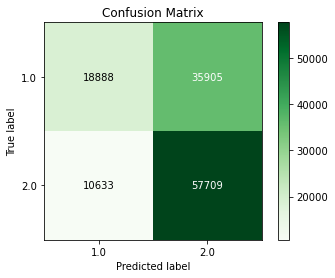

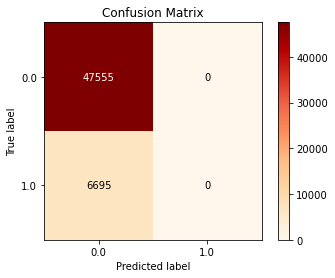

In [511]:
skplt.metrics.plot_confusion_matrix(y_test, test_res, cmap = "Greens")
skplt.metrics.plot_confusion_matrix(y_testd, test_resd, cmap = "OrRd")

In [512]:
print("Accuracy score for logistic regression is : ", metrics.accuracy_score(y_test, test_res))
accs.append(metrics.accuracy_score(y_test, test_res))
print("Recall score for logistic regression is : ", metrics.recall_score(y_test, test_res))
print("Precision score for logistic regression is : ", metrics.precision_score(y_test, test_res))

print("____________________________________________________________________")

print("Accuracy score for logistic regression is : ", metrics.accuracy_score(y_testd, test_resd))
accsd.append(metrics.accuracy_score(y_testd, test_resd))
print("Recall score for logistic regression is : ", metrics.recall_score(y_testd, test_resd))
print("Precision score for logistic regression is : ", metrics.precision_score(y_testd, test_resd))

Accuracy score for logistic regression is :  0.6220570918098023
Recall score for logistic regression is :  0.3447155658569525
Precision score for logistic regression is :  0.63981572439958
____________________________________________________________________
Accuracy score for logistic regression is :  0.876589861751152
Recall score for logistic regression is :  0.0
Precision score for logistic regression is :  0.0


C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [513]:
print(log.score(x_train, y_train))
print(log.score(x_test, y_test))
print("Error for logistic regression equals : "+ str(round(log.score(x_test, y_test), 4)) + " - " + str(round(log.score(x_train, y_train), 4)) + " = " + str(abs(round(log.score(x_test, y_test) - log.score(x_train, y_train), 4))))

print("____________________________________________________________________\n")

print(logd.score(x_traind, y_traind))
print(logd.score(x_testd, y_testd))
print("Error for logistic regression equals : "+ str(round(logd.score(x_testd, y_testd), 4)) + " - " + str(round(logd.score(x_traind, y_traind), 4)) + " = " + str(abs(round(logd.score(x_testd, y_testd) - logd.score(x_traind, y_traind), 4))))

0.6243117254373285
0.6220570918098023
Error for logistic regression equals : 0.6221 - 0.6243 = 0.0023
____________________________________________________________________

0.8785437788018433
0.876589861751152
Error for logistic regression equals : 0.8766 - 0.8785 = 0.002


Feature: 0, Score: -0.81266
Feature: 1, Score: -0.33805
Feature: 2, Score: 0.10249
Feature: 3, Score: -0.26075
Feature: 4, Score: 0.02654
Feature: 5, Score: 0.28775
Feature: 6, Score: -0.13129
Feature: 7, Score: -0.17183
Feature: 8, Score: 0.13075
Feature: 9, Score: 0.52018


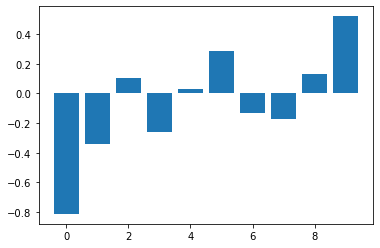

In [514]:
importance = log.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.01566
Feature: 1, Score: 0.03188
Feature: 2, Score: -0.00003
Feature: 3, Score: -0.01078
Feature: 4, Score: 0.05251
Feature: 5, Score: 0.01769
Feature: 6, Score: -0.01961
Feature: 7, Score: -0.03491
Feature: 8, Score: -0.05666
Feature: 9, Score: -0.03435


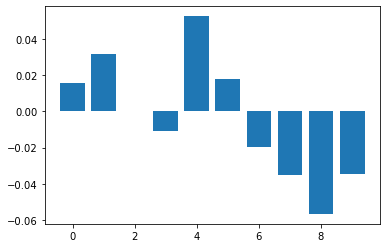

In [515]:
importance = logd.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# <font color = 'green'> Applying Decesion tree , XGboost , Adaboost, naive bias on covid and covid_death </font>

In [516]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [517]:
classifiers = [DecisionTreeClassifier (max_depth = 7, max_features = 4), 
               RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = 4), 
               XGBClassifier(objective = 'binary:logistic', n_estimators = 10, random_state = 42, learning_rate = 0.5, max_depth = 5),
               AdaBoostClassifier(n_estimators = 50 , learning_rate = 0.4),
               GaussianNB() 
        ]

Accuracy score for DecisionTreeClassifier(max_depth=7, max_features=4) is :  0.6367564055711211
DecisionTreeClassifier(max_depth=7, max_features=4)score is :  0.6398530598101797
DecisionTreeClassifier(max_depth=7, max_features=4)score is :  0.6367564055711211


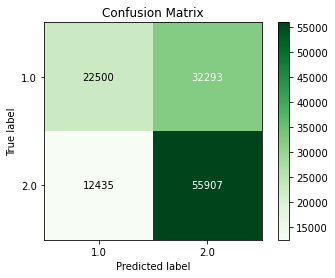

Feature: 0, Score: 0.46723
Feature: 1, Score: 0.02468
Feature: 2, Score: 0.04961
Feature: 3, Score: 0.00414
Feature: 4, Score: 0.00878
Feature: 5, Score: 0.00842
Feature: 6, Score: 0.00182
Feature: 7, Score: 0.14568
Feature: 8, Score: 0.21778
Feature: 9, Score: 0.07186


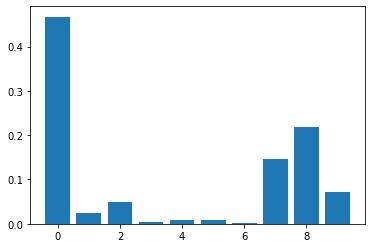


____________________________________________________________

Accuracy score for RandomForestClassifier(max_depth=6, max_features=4, n_estimators=10) is :  0.6382507004507249
RandomForestClassifier(max_depth=6, max_features=4, n_estimators=10)score is :  0.6405379505254438
RandomForestClassifier(max_depth=6, max_features=4, n_estimators=10)score is :  0.6382507004507249


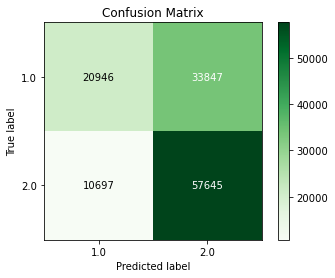

Feature: 0, Score: 0.27473
Feature: 1, Score: 0.03019
Feature: 2, Score: 0.08773
Feature: 3, Score: 0.01237
Feature: 4, Score: 0.00477
Feature: 5, Score: 0.02984
Feature: 6, Score: 0.01326
Feature: 7, Score: 0.27516
Feature: 8, Score: 0.17905
Feature: 9, Score: 0.09290


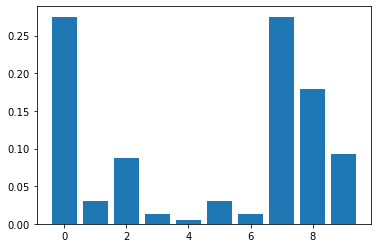


____________________________________________________________



C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is :  0.6419214683071426
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
   

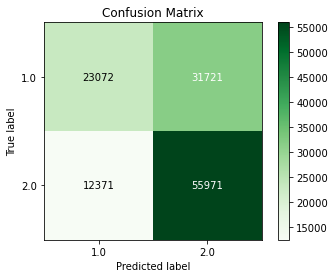

Feature: 0, Score: 0.52280
Feature: 1, Score: 0.03830
Feature: 2, Score: 0.03899
Feature: 3, Score: 0.01274
Feature: 4, Score: 0.01771
Feature: 5, Score: 0.03220
Feature: 6, Score: 0.01530
Feature: 7, Score: 0.12282
Feature: 8, Score: 0.12787
Feature: 9, Score: 0.07127


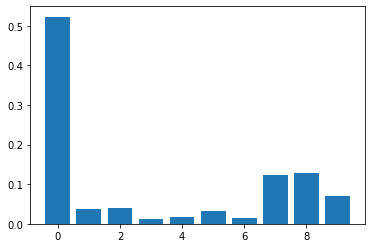


____________________________________________________________

Accuracy score for AdaBoostClassifier(learning_rate=0.4) is :  0.6354488975514679
AdaBoostClassifier(learning_rate=0.4)score is :  0.6356273111677793
AdaBoostClassifier(learning_rate=0.4)score is :  0.6354488975514679


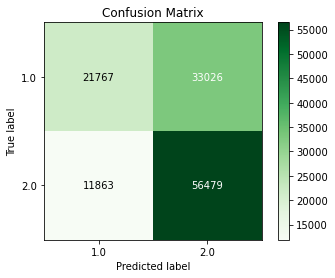

Feature: 0, Score: 0.10000
Feature: 1, Score: 0.10000
Feature: 2, Score: 0.10000
Feature: 3, Score: 0.04000
Feature: 4, Score: 0.06000
Feature: 5, Score: 0.08000
Feature: 6, Score: 0.04000
Feature: 7, Score: 0.04000
Feature: 8, Score: 0.32000
Feature: 9, Score: 0.12000


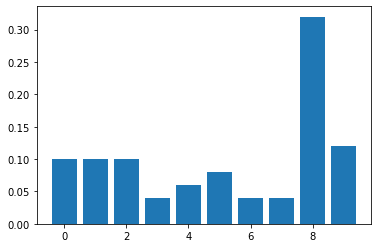


____________________________________________________________

Accuracy score for GaussianNB() is :  0.6138628334754538
GaussianNB()score is :  0.6142657592541458
GaussianNB()score is :  0.6138628334754538


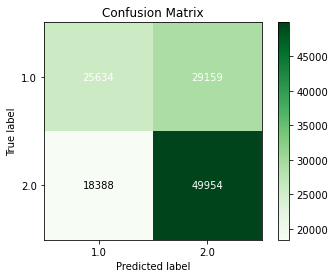


____________________________________________________________



In [518]:
for i in classifiers :
    classifier = i
    classifier.fit(x_train, y_train)
    res = classifier.predict(x_test)
    print("Accuracy score for " + str(i) + " is : ", metrics.accuracy_score(y_test, res))
    accs.append(metrics.accuracy_score(y_test, res))
    print(str(i) + "score is : ", classifier.score(x_train, y_train))
    print(str(i) + "score is : ", classifier.score(x_test, y_test))
    skplt.metrics.plot_confusion_matrix(y_test, res, cmap = "Greens")
    plt.show()
    if str(classifier) != 'GaussianNB()' :
        importance = classifier.feature_importances_

        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))

        plt.bar([x for x in range(len(importance))], importance)
        plt.show()
    print("\n____________________________________________________________\n")

Accuracy score for DecisionTreeClassifier(max_depth=7, max_features=4) is :  0.8762396313364055
DecisionTreeClassifier(max_depth=7, max_features=4)score for train is :  0.8787342549923195
DecisionTreeClassifier(max_depth=7, max_features=4)score for test is :  0.8762396313364055


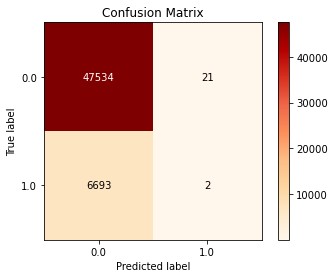

Feature: 0, Score: 0.04027
Feature: 1, Score: 0.12522
Feature: 2, Score: 0.03196
Feature: 3, Score: 0.15486
Feature: 4, Score: 0.05785
Feature: 5, Score: 0.06089
Feature: 6, Score: 0.12410
Feature: 7, Score: 0.16619
Feature: 8, Score: 0.15477
Feature: 9, Score: 0.08389


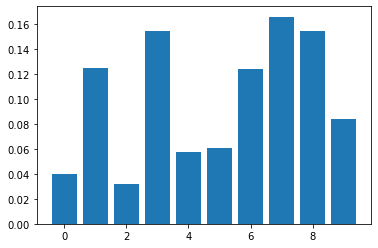


____________________________________________________________

Accuracy score for RandomForestClassifier(max_depth=6, max_features=4, n_estimators=10) is :  0.876589861751152
RandomForestClassifier(max_depth=6, max_features=4, n_estimators=10)score for train is :  0.8785499231950845
RandomForestClassifier(max_depth=6, max_features=4, n_estimators=10)score for test is :  0.876589861751152


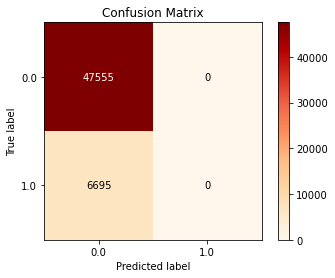

Feature: 0, Score: 0.11445
Feature: 1, Score: 0.09555
Feature: 2, Score: 0.09407
Feature: 3, Score: 0.08846
Feature: 4, Score: 0.10640
Feature: 5, Score: 0.07450
Feature: 6, Score: 0.12874
Feature: 7, Score: 0.09440
Feature: 8, Score: 0.12462
Feature: 9, Score: 0.07882


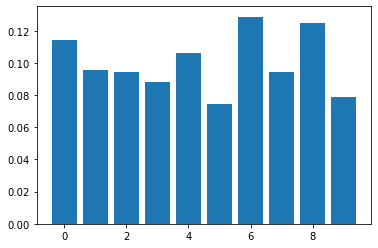


____________________________________________________________



C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is :  0.876589861751152
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    

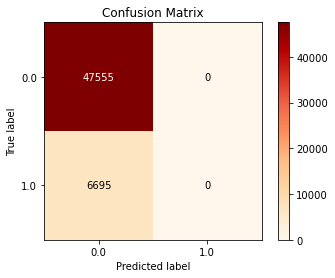

Feature: 0, Score: 0.10734
Feature: 1, Score: 0.11953
Feature: 2, Score: 0.11077
Feature: 3, Score: 0.09137
Feature: 4, Score: 0.09677
Feature: 5, Score: 0.09201
Feature: 6, Score: 0.09837
Feature: 7, Score: 0.08301
Feature: 8, Score: 0.08837
Feature: 9, Score: 0.11246


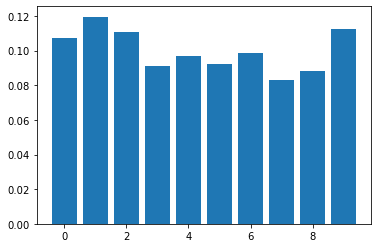


____________________________________________________________

Accuracy score for AdaBoostClassifier(learning_rate=0.4) is :  0.8765714285714286
AdaBoostClassifier(learning_rate=0.4)score for train is :  0.8785560675883256
AdaBoostClassifier(learning_rate=0.4)score for test is :  0.8765714285714286


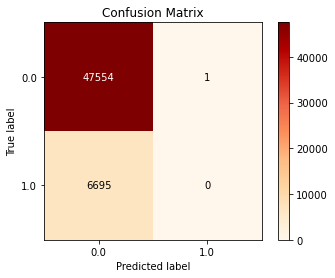

Feature: 0, Score: 0.10000
Feature: 1, Score: 0.12000
Feature: 2, Score: 0.14000
Feature: 3, Score: 0.14000
Feature: 4, Score: 0.12000
Feature: 5, Score: 0.02000
Feature: 6, Score: 0.22000
Feature: 7, Score: 0.04000
Feature: 8, Score: 0.04000
Feature: 9, Score: 0.06000


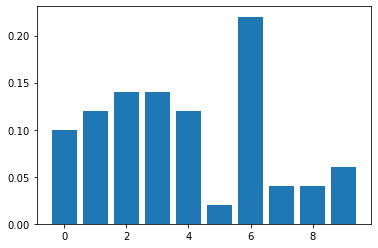


____________________________________________________________

Accuracy score for GaussianNB() is :  0.876589861751152
GaussianNB()score for train is :  0.8785437788018433
GaussianNB()score for test is :  0.876589861751152


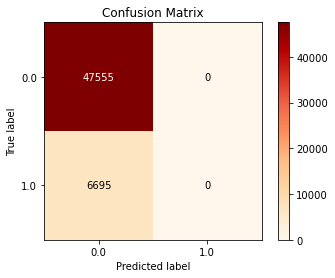


____________________________________________________________



In [519]:
# results for covid death
for i in classifiers :
    classifier = i
    classifier.fit(x_traind, y_traind)
    resd = classifier.predict(x_testd)
    print("Accuracy score for " + str(i) + " is : ", metrics.accuracy_score(y_testd, resd))
    accsd.append(metrics.accuracy_score(y_testd, resd))
    print(str(i) + "score for train is : ", classifier.score(x_traind, y_traind))
    print(str(i) + "score for test is : ", classifier.score(x_testd, y_testd))
    skplt.metrics.plot_confusion_matrix(y_testd, resd, cmap = "OrRd")
    plt.show()
    if str(classifier) != 'GaussianNB()' :
        importance = classifier.feature_importances_

        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))

        plt.bar([x for x in range(len(importance))], importance)
        plt.show()
    print("\n____________________________________________________________\n")

# <font color= 'green'> Applying Voting classifier on covid and covid death </font>

In [520]:
from sklearn.ensemble import VotingClassifier

In [521]:
ada = AdaBoostClassifier(n_estimators = 10 , learning_rate = 0.4)
rnf = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = 10)
XGb = XGBClassifier(objective = 'binary:logistic', n_estimators = 10, random_state = 42, learning_rate = 0.5, max_depth = 5)

vot = VotingClassifier(estimators = [('ada', ada), ('XGb',XGb), ('rnf', rnf)], voting = 'hard')

C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

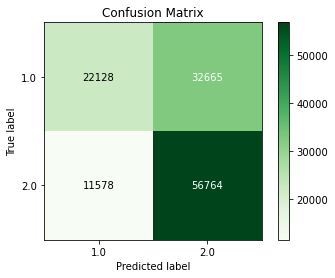

In [522]:
vot.fit(x_train, y_train)
pred_test6 = vot.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_test6, cmap = "Greens")

In [523]:
print("Accuracy score for  Voting Classifier is : ", metrics.accuracy_score(y_test, pred_test6))
accs.append(metrics.accuracy_score(y_test, pred_test6))
print("Voting Classifier score is : ", vot.score(x_train, y_train))
print("Voting Classifier score is : ", vot.score(x_test, y_test))

Accuracy score for  Voting Classifier is :  0.6406951719657287
Voting Classifier score is :  0.6421838539044185
Voting Classifier score is :  0.6406951719657287


In [524]:
votd = VotingClassifier(estimators = [('ada', ada), ('XGb',XGb), ('rnf', rnf)], voting = 'hard')

C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

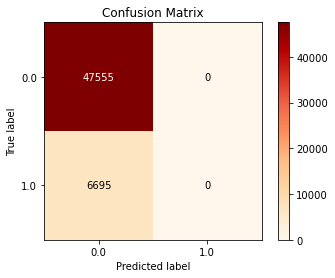

In [525]:
votd.fit(x_traind, y_traind)
pred_testd6 = votd.predict(x_testd)
skplt.metrics.plot_confusion_matrix(y_testd, pred_testd6, cmap = "OrRd")

In [526]:
print("Accuracy score for  Voting Classifier is : ", metrics.accuracy_score(y_testd, pred_testd6))
accsd.append(metrics.accuracy_score(y_testd, pred_testd6))
print("Voting Classifier score is : ", votd.score(x_traind, y_traind))
print("Voting Classifier score is : ", votd.score(x_testd, y_testd))

Accuracy score for  Voting Classifier is :  0.876589861751152
Voting Classifier score is :  0.8785437788018433
Voting Classifier score is :  0.876589861751152


# <font color = 'blue'>We can see that XGboost is best for covid and covid death </font>

In [436]:
algorithm_names = ['Logistic Regression', 'Decision tree Classifier', 'Random Forest Classifier', 
                   'XGboost','Adaboost', 'GaussianNB', 'Voting Classifier']


In [363]:
algorithm_names

['Logistic Regression',
 'Decision tree Classifier',
 'Random Forest Classifier',
 'XGboost',
 'Adaboost',
 'GaussianNB',
 'Voting Classifier']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision tree Classifier'),
  Text(2, 0, 'Random Forest Classifier'),
  Text(3, 0, 'XGboost'),
  Text(4, 0, 'Adaboost'),
  Text(5, 0, 'GaussianNB'),
  Text(6, 0, 'Voting Classifier')])

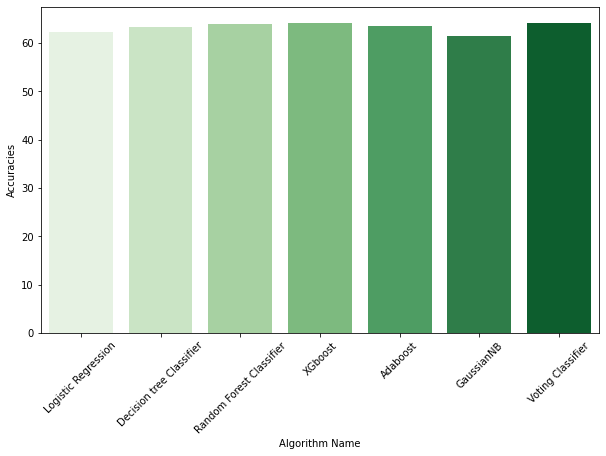

In [364]:
accs = np.array(accs)
algorithm_names = np.array(algorithm_names)

plt.figure(figsize = (10,6))
sns.barplot(y = accs*100, x = algorithm_names, estimator = np.median,  palette = 'Greens')
plt.xlabel('Algorithm Name')
plt.ylabel('Accuracies')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision tree Classifier'),
  Text(2, 0, 'Random Forest Classifier'),
  Text(3, 0, 'XGboost'),
  Text(4, 0, 'Adaboost'),
  Text(5, 0, 'GaussianNB'),
  Text(6, 0, 'Voting Classifier')])

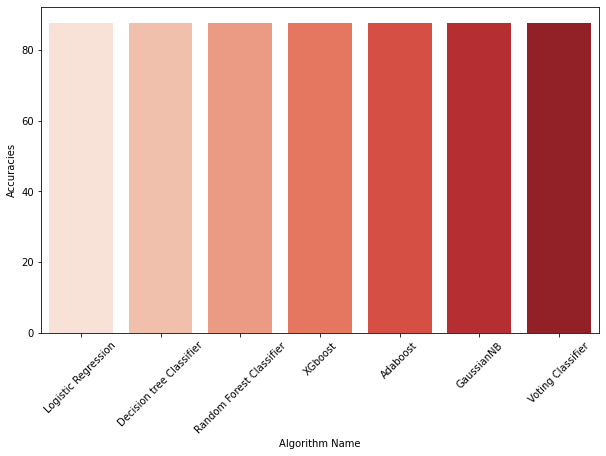

In [365]:
accsd = np.array(accsd)

plt.figure(figsize = (10,6))
sns.barplot(x = algorithm_names, y = accsd*100,estimator = np.median,  palette = 'Reds')
plt.xlabel('Algorithm Name')
plt.ylabel('Accuracies')
plt.xticks(rotation = 45)

In [332]:
accs

array([0.62289357, 0.6351809 , 0.64032972, 0.64136111, 0.63499411,
       0.61310756, 0.64054899])

# <font color= 'green'> Applying pipe line on XGboost </font>

In [333]:
from sklearn.pipeline import Pipeline

In [334]:
pipe = Pipeline ([
    ('reducer' , PCA()),
    ('classifier' , XGBClassifier(objective = 'binary:logistic', n_estimators = 10, random_state = 42, learning_rate = 0.5, max_depth = 5)
)]
)

In [335]:
pipe.fit(x_train, y_train)

C:\Users\es-abdoahmed022\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('reducer', PCA()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=8, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [336]:
resp = pipe.predict(x_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

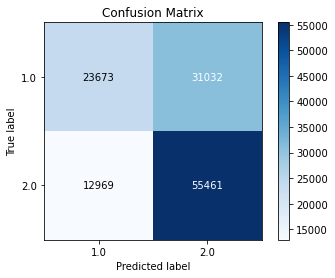

In [337]:
skplt.metrics.plot_confusion_matrix(y_test, resp)

In [338]:
pipe.steps[0][1].explained_variance_ratio_.cumsum()

array([0.22931214, 0.40105407, 0.55836298, 0.66385526, 0.74790274,
       0.82800992, 0.8819308 , 0.93423765, 0.96980624, 1.        ])

In [339]:
print("Accuracy score for  pipe is : ", metrics.accuracy_score(y_test, resp))
print(pipe.score(x_train, y_train))
print(pipe.score(x_test, y_test))

Accuracy score for  pipe is :  0.6426604945791204
0.6458654798837039
0.6426604945791204


# <font color= 'green'> Applying Grid search on XGboost </font>

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
param_grid = {
    'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'n_estimators' : [50, 60, 70, 80, 90, 100, 110]
    }

In [125]:
XGB2 = XGBClassifier(objective = 'binary:logistic', n_estimators = 10, random_state = 42, learning_rate = 0.5, max_depth = 5)


In [ ]:
grid = GridSearchCV(estimator = XGB2, param_grid = param_grid, n_jobs = -1, verbose = 1, cv =3)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


In [ ]:
print("best : " + str(grid_result.best_score_) + " using : " + str(grid_result.best_params_))

In [ ]:
model = grid_result.best_estimator_
model

In [ ]:
model_pred = model.predict(x_test)
print("The accuracy : ", metrics.accuracy_score(y_test, model_pred))
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# <font color = 'red'> End of project </font>

# <font color = 'blue'> Thank you for your time :) </font>